In [8]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
tf.random.set_seed(123)

x = np.array([[0,0] , [0,1] ,[1,0] , [1,1]] , dtype= np.float32)
y = np.array([[1,0] , [0,1] ,[0,1] , [1,0]] , dtype= np.float32)

learning_rate = 0.15

#x= tf.placeholder(tf.float32 , shape =(None,2) )
#y = tf.placeholder(tf.float32 , shape = (None,2))
#x = tf.convert_to_tensor(x_data,  dtype = tf.float32)
#y = tf.convert_to_tensor(y_data , dtype = tf.float32)

#h1_w23 = tf.truncated_normal(shape = (2,3) , mean = 0 ,stddev = 1.0 ,dtype = tf.float32)
#h1_b13 = tf.zeros(shape = (1,3))
fw = tf.keras.initializers.truncated_normal()
fb = tf.keras.initializers.truncated_normal()

w1 = tf.Variable(tf.random.normal([2,10]) , dtype = tf.float32)
b1 = tf.Variable(tf.random.normal([1,10]), dtype = tf.float32)

w2 = tf.Variable(tf.random.normal([10,2]) , dtype = tf.float32)
b2 = tf.Variable(tf.random.normal([1,2]) , dtype = tf.float32)
#w1 = tf.Variable(h1_w23)
#b1 = tf.Variable(h1_b13)
#입력 -> 히든


In [10]:
x.shape
y.shape

(4, 2)

In [2]:
#히든->출력
#o_w31 = tf.truncated_normal(shape = (3,1) , mean =0 ,stddev = 1.0 , dtype = tf.float32)
#o_b11 = tf.zeros(shape = (1,1))
#w2 = tf.Variable(o_w31)
#b2 = tf.Variable(o_b11)


#z1 = tf.matmul(x,w1) +b1
#a1 = tf.sigmoid(z1)

#z2 = tf.matmul(a1 ,w2) +b2
#a2 = tf.sigmoid(z2)

#yhat = a2
#loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = y , logits = z2)
#loss = tf.reduce_mean(loss)
# 위 네트워크 설계

#loss = -y*tf.log(yhat) - (1-y) *tf.log(1-yhat) #4*1
#loss = tf.reduce_mean(loss)

#optimizer = tf.train.GradientDescentOptimizer(learning_rate)
#optimizer = tf.train.AdamOptimizer(learning_rate)
#train = optimizer.minimize(loss)

#thresholding = tf.greater_equal(yhat , 0.5)
#thresholding = tf.cast(thresholding ,tf.float32) #true - 1.0 false - 0.0

#prediction = tf.cast(tf.equal(thresholding , y) , tf.float32)
#correct = tf.equal(tf.argmax(y , axis = 1) , tf.argmax(yhat , axis=1))
#correct = tf.cast(correct , tf.float32)
#accuracy = tf.reduce_mean(correct)


#accuracy = tf.reduce_mean(prediction)


#sess = tf.Session()
#sess.run(tf.global_variables_initializer())




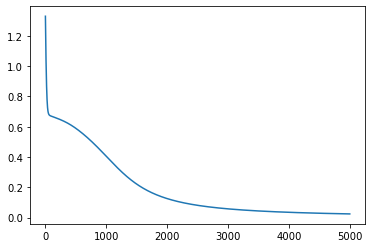

In [3]:
loss_ = []
epoch = 5000
optimizer = tf.keras.optimizers.SGD(learning_rate)
#optimizer = tf.keras.optimizers.Adam(learning_rate )    
def binary_crossentropy_logits(y,logits) :
    #cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels = y , logits = logits)
    cross_entropy = -y*tf.math.log(logits) - (1-y) *tf.math.log(1-logits)
    loss = tf.reduce_mean(cross_entropy)
    return loss
for i in range(epoch):
    with tf.GradientTape() as tape:
        z1 = tf.matmul(x,w1) +b1
        a1 = tf.sigmoid(z1)
        z2 = tf.matmul(a1 ,w2) +b2
        a2 = tf.sigmoid(z2)
        yhat = a2 
        loss_value = binary_crossentropy_logits(y,yhat)
    gradients = tape.gradient(loss_value , [w1,w2,b1,b2])
        #loss = tf.reduce_mean((y-yhat) * (y-yhat))
    #gradients = tape.gradient(loss ,[w1,b1,w2,b2])
    
    #train = optimizer.minimize(gradients ,var_list =[w1,b1,w2,b2])
    loss_.append(loss_value)
    optimizer.apply_gradients(grads_and_vars = zip(gradients,[w1,w2,b1,b2]))
    #dw1,db1,dw2,db2 = tape.gradient(loss , [w1,b1,w2,b2])
    
    #loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = y , logits = z2)
    #loss = 1/4*(-y*tf.math.log(yhat) - (1-y) *tf.math.log(1-yhat))
    #dw1,db1,dw2 , db2  = tape.gradient(loss , [w1,b1,w2,b2])
    #optimizer.apply_gradients(grads_and_vars = zip([dw1,db1],[w1,b1]))
    #optimizer.apply_gradients(grads_and_vars = zip([dw2,db2],[w2,b2]))
    #loss = tf.reduce_mean(loss)
    

    #loss_.append(loss_value)
    correct = tf.equal(tf.argmax(y , axis = 1) , tf.argmax(yhat , axis=1))
    correct = tf.cast(correct , tf.float32)
    accuracy = tf.reduce_mean(correct)
    #print(i,loss_value)
    #loss_.append(loss)
    #outs =  sess.run([train,loss,yhat ] , feed_dict = {x:x_data , y:y_data})
    #print(i ,outs[1])
    #loss_.append(outs[1])
    

#loss 보고 학습더해야될지 판단
plt.plot(loss_)
plt.show()

In [4]:
correct

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

In [5]:
def test_func(x,y):
    test= [[x,y]]
    z1 = tf.matmul(test,w1) +b1
    a1 = tf.sigmoid(z1)
    z2 = tf.matmul(a1 ,w2) +b2
    a2 = tf.sigmoid(z2)
    yhat = a2 
    thresholding = tf.greater_equal(yhat , 0.5)
    thresholding = tf.cast(thresholding ,tf.float32)
    return thresholding

In [6]:
pt = np.arange(0,1 ,0.01)
pt_x,pt_y = np.meshgrid(pt,pt)
pt_shape = pt_x.shape
pt_x = pt_x.flatten()
pt_y = pt_y.flatten()

x_test = np.vstack((pt_x,pt_y)).T
y_test = np.zeros(shape = (x_test.shape[0],2))
x_test[0][0]
#test_func(0.1,0.3)[0]

0.0

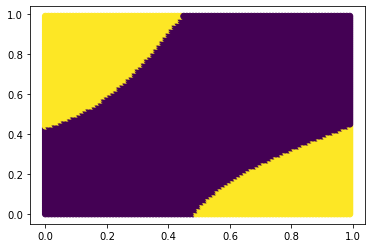

In [7]:
result = []
a= np.array
for x in range(10000):
    result.append( test_func(np.float32(x_test[x][0]) , np.float32(x_test[x][1])))
    
#print(result)
result = np.array(result)

#print(result)
#result = np.argmax(result,axis = 1).astype(np.int32)
#print(result)
#print(labels)
colors = ['r' , 'b']

#print(result.shape)
pt_x = pt_x.reshape(pt_shape)
#print(pt_x)
pt_y = pt_y.reshape(pt_shape)
label = [0 for i in range(10000)]
x =0
for i in range(0,10000) :
    for j in range(0,2) :
        if(result[i][0][j] ==1 ):
            label[i] = j
#label = np.array([colors[i] = result[i][0][j] for (i,j) in result])
label = np.array(label)
label = label.reshape(pt_shape)
#for i in range (0,100):
    #for j in range (0,100):
        #print(label[i][j] , end='')
    #print()

#plt.plot(label)
#plt.imshow(label)
#plt.contourf(pt_x,pt_y,label, cmap = plt.cm.Spectral)
plt.scatter(pt_x ,pt_y , c= label)
plt.show()
#sess.close()
